# Getting started - Requirements
Python (🐍):  This assumes that you have a python environment installed. If you haven't, we recommend installing [Anaconda](https://docs.anaconda.com/anaconda/install/).

FPsim (♀️): This tutorial uses [FPsim v2.0](https://github.com/fpsim/fpsim/tree/rc2.0-methodtime). 

To install, you first need to clone or download the a copy of the source code from https://github.com/fpsim/fpsim
 
```
git clone -b rc2.0-methodtime --single-branch https://github.com/fpsim/fpsim.git
cd fpsim
pip install -e .
```

If it worked, you should be able to import fpsim with `import fpsim as fp`.

<div class="alert alert-info">
    
An interactive version of this notebook is available on [Google Colab](https://colab.research.google.com/github/fpsim/fpsim/blob/main/docs/tutorials/T5_new_method.ipynb?install=fpsim) or [Binder](https://mybinder.org/v2/gh/fpsim/fpsim/HEAD?labpath=docs%2Ftutorials%2FT5_new_method.ipynb).
    
</div>

# Adding a new method 
At this point, you should be able to ru FPsim, create interventions, and set eligilble subpopulations for that inervention. Now, let's see how to create a different type of intervention: introducing a new contraceptive method. First, import the model.

In [8]:
import fpsim as fp
import sciris as sc

We will start by making a copy of the default list of contraceptive methods used by FPsim. We need this so that we can add our new metod to the list.

In [9]:
my_methods = fp.make_methods().Methods

### Define a new method
To define and parameterize your new method, you need to enter attributes:
1. A simple name, which needs to be concise because it will be used inside the code.
2. Efficacy, defined as a percent.
3. Whether it is a modern method or not, defined as true or false.
4. Duration of use, or time on that method, which can me defined as a number of months, or a distribution. If you choose a distribution, you need to define the type of distribution (e.g. lognormal, loglogistic, ...) as well as the parameters for that distribution. See tutorial three for more information on time on method.
5. A label, which can be more descriptive as it is used in plots

You create the new method using code like this:

In [10]:
new_method = fp.Method(name='new', efficacy=0.96,  modern=True,  dur_use=15, label='New method')

Add your method to the list of methods in the model.

In [11]:
my_methods += new_method

The final thing we need to define for our new method is the method mix. This tell the model which method a woman will choose when she slects a method. We need an array of percentages for each method, incuding the new method.

In [12]:
# Note: if we do not define this method mix, the contraception module will use 1/(number of methods) for every method.   
method_choice = fp.RandomChoice(methods=my_methods, pars={'method_mix': [0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0.5]})

# Run your simulations
Define the baseline settings for your analysis.

In [13]:
pars = dict(
    n_agents   = 10_000,
    start_year = 2000, 
    end_year   = 2012,
    exposure_factor = 1.0  # Overall scale factor on probability of becoming pregnant
)

Define two simulaitons: s1, the baseline with no interventions, and s2, adding the new method we defined above as the contraception module. Then run both of these together.

In [14]:
s1 = fp.Sim(pars=pars, label='Baseline')
s2 = fp.Sim(pars=pars, contraception_module=method_choice, label='New Method')
simlist = sc.autolist([s1, s2])
msim = fp.MultiSim(sims=simlist)
msim.run(parallel=False, compute_stats=False)

Location not supplied: using parameters from Senegal
Location not supplied: using parameters from Senegal
Initializing sim "Sim 0" with 10000 agents


————————————————————————————————————————————
  Running "Sim 0": 2000.0 ( 0/145) (0.00 s) 
————————————————————————————————————————————



————————————————————————————————————————————
  Running "Sim 0": 2000.1 ( 1/145) (0.02 s) 
————————————————————————————————————————————



————————————————————————————————————————————
  Running "Sim 0": 2000.2 ( 2/145) (0.04 s) 
————————————————————————————————————————————



————————————————————————————————————————————
  Running "Sim 0": 2000.2 ( 3/145) (0.05 s) 
————————————————————————————————————————————



————————————————————————————————————————————
  Running "Sim 0": 2000.3 ( 4/145) (0.07 s) 
————————————————————————————————————————————



————————————————————————————————————————————
  Running "Sim 0": 2000.4 ( 5/145) (0.11 s) 
————————————————————————————————————————————



—————————————————————

MultiSim(n_sims: 2; base: Sim(Sim 0; n=10000; 2000—2012))

Take a look at the contraceptive use from your simulations.

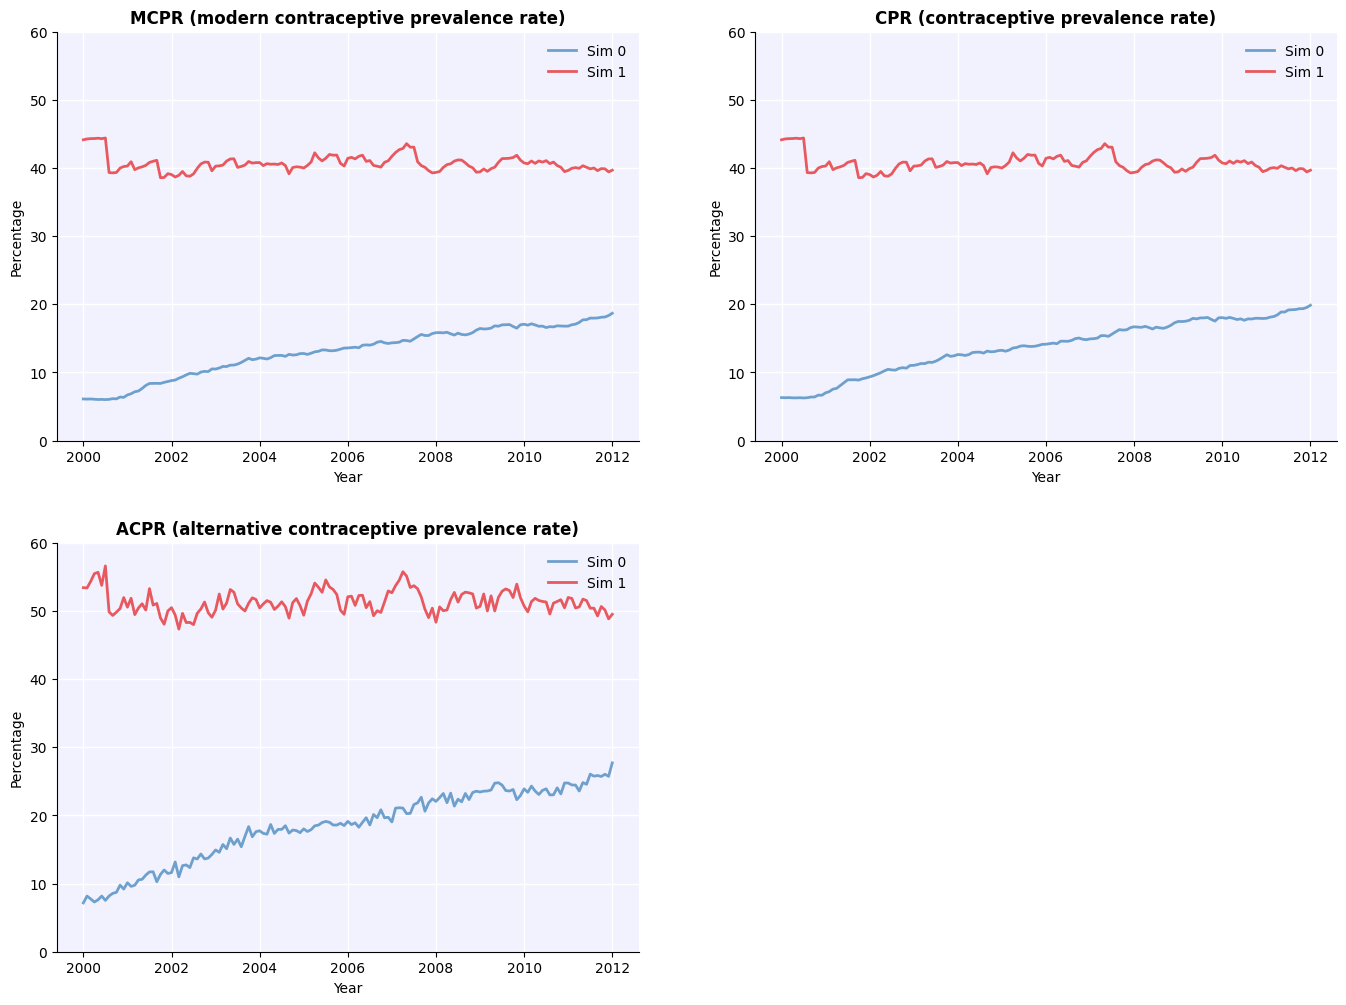

In [15]:
msim.plot(to_plot='cpr');